In [34]:
!pip install scikit-learn
!pip install seaborn
!pip install pandas

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def load_dataset(filename):
    dataset = pd.read_csv(filename)
    column = list(dataset.column)
    price = column.pop(6)
    column.append(price)
    return dataset[column]

In [38]:
dataset = pd.read_csv("Red.csv")
dataset.head(10)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,43.87,2016
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.9,100,17.52,2014
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.6,100,10.75,2015
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.5,100,6.90,2014


In [119]:
dataset.isna().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64

In [120]:
dataset.columns

Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year'],
      dtype='object')

In [121]:
def clean_dataset(dataset):
    dataset = dataset.drop("Name", axis=1)
    dataset['Year'] = dataset['Year'].replace('N.V.', 2021)
    dataset['Year'] = dataset['Year'].astype('int')
    dataset.isnull().any()
    dataset.isnull().sum()/ dataset.shape[0]
    return dataset

In [122]:
dataset = clean_dataset(dataset)
dataset.tail()

,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
8661,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019
8665,Argentina,Tunuyán,Salentein,3.4,999,7.88,2016


In [139]:
def print_hist(data):
    plt.figure(figsize=(10,10))
    sns.barplot(x="Country",
                y="Rating",
                data=data)  # dataset o'rniga vino_df yozilishi kerak
    plt.xticks(rotation=45)
    plt.show()

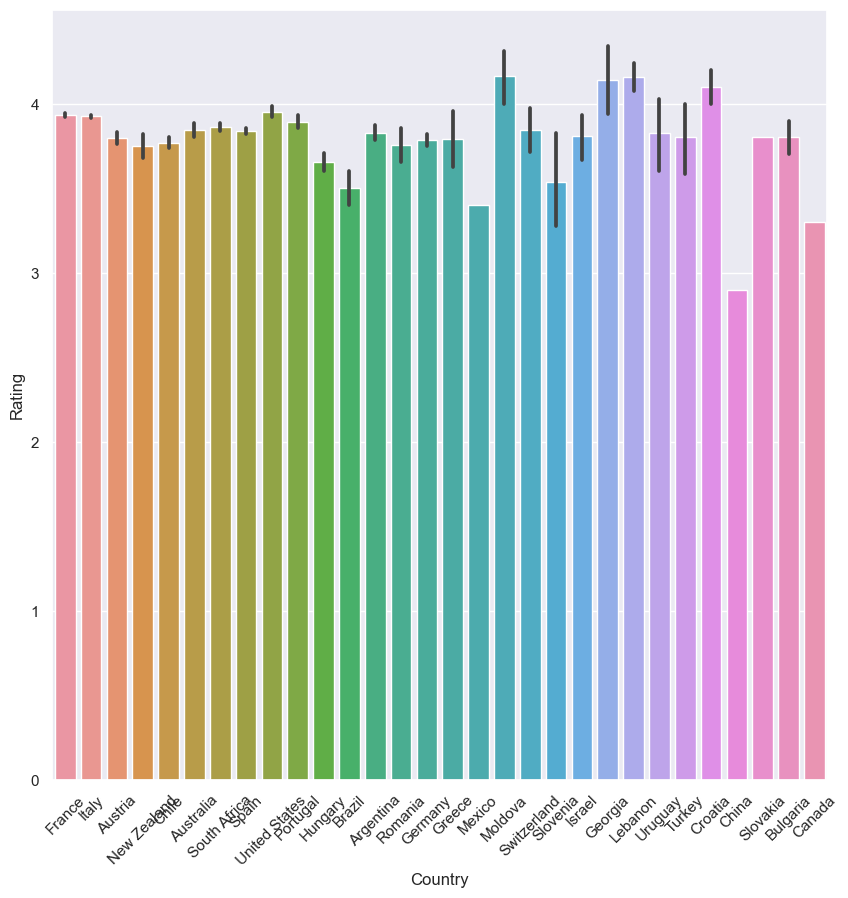

In [140]:
print_hist(dataset)

In [41]:
def pie(data):
    df_country = data.groupby(data['Country'])['Country'].count().sort_values(ascending=False).head(10)
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    df_country.plot.pie(autopct='%1.f%%',
                                                                 wedgeprops={'linewidth':2,'edgecolor':'white'},
                                                                 shadow=True,
                                                                 fontsize=20)
    plt.title("Wise Distribution of Country %")
    plt.subplot(122)
    df_country.plot(marker='o',markersize=10,color='red')
    df_country.plot(kind='bar',color='blue')
    plt.title("Distribution of Country");
    plt.show()

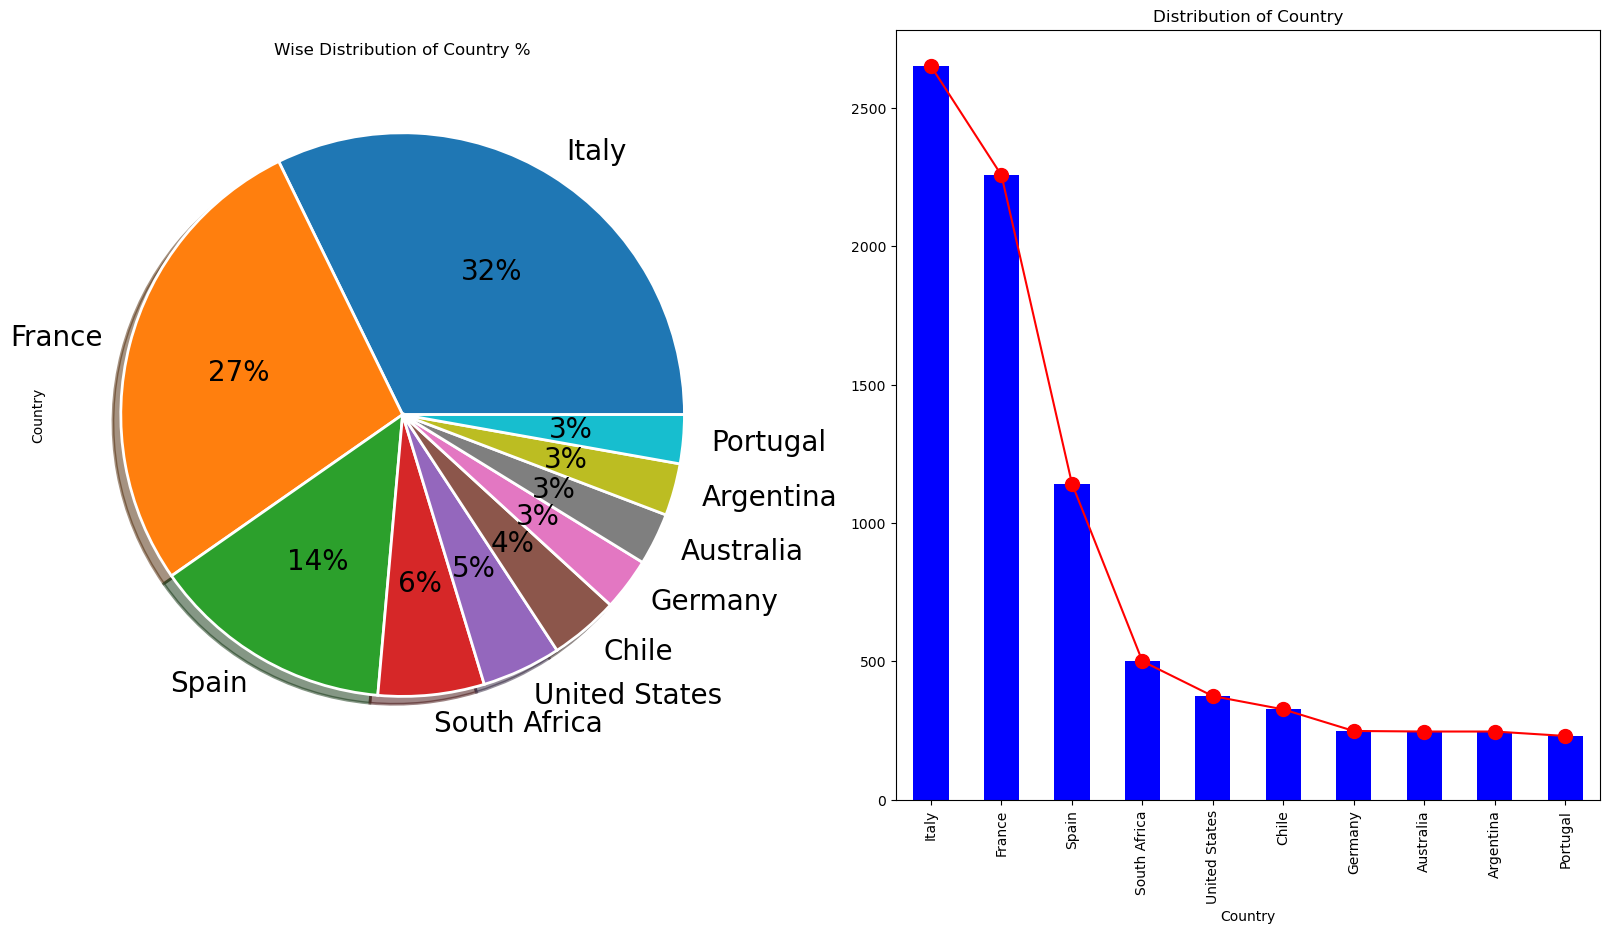

In [42]:
pie(dataset)

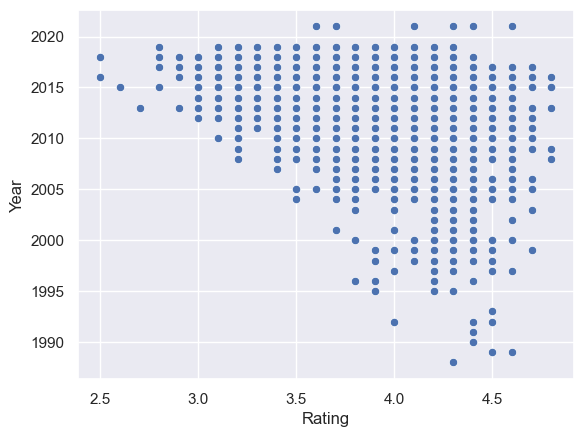

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

def dataset_rating_years(dataset):
    sns.scatterplot(x='Rating', y='Year', data=dataset)
    plt.show()


dataset_rating_years(dataset)


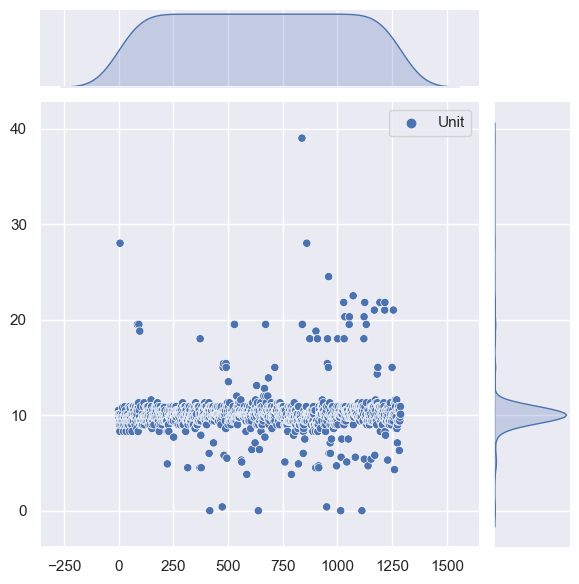

In [184]:
sns.jointplot(data=vino_df)
plt.show()

In [62]:
def encoder(dataset):
    encoder = LabelEncoder()
    columns = list(dataset.columns) 
    
    for column in columns:        
        if dataset[column].dtype != int:
            print(f"{column} column is encoding")
            new_column = encoder.fit(dataset[column])
            dataset[column] = new_column.transform(dataset[column])
    return dataset

In [64]:
dataset = encoder(dataset.copy())

Rating column is encoding
NumberOfRatings column is encoding
Price column is encoding


In [65]:
dataset.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,4600,9,408,649,17,75,2109,22
1,3494,9,286,744,18,75,684,28
2,2172,15,542,2172,14,75,184,26
3,523,15,41,439,10,75,274,30
4,5013,2,104,1794,14,75,1246,27


<Figure size 2000x1000 with 0 Axes>

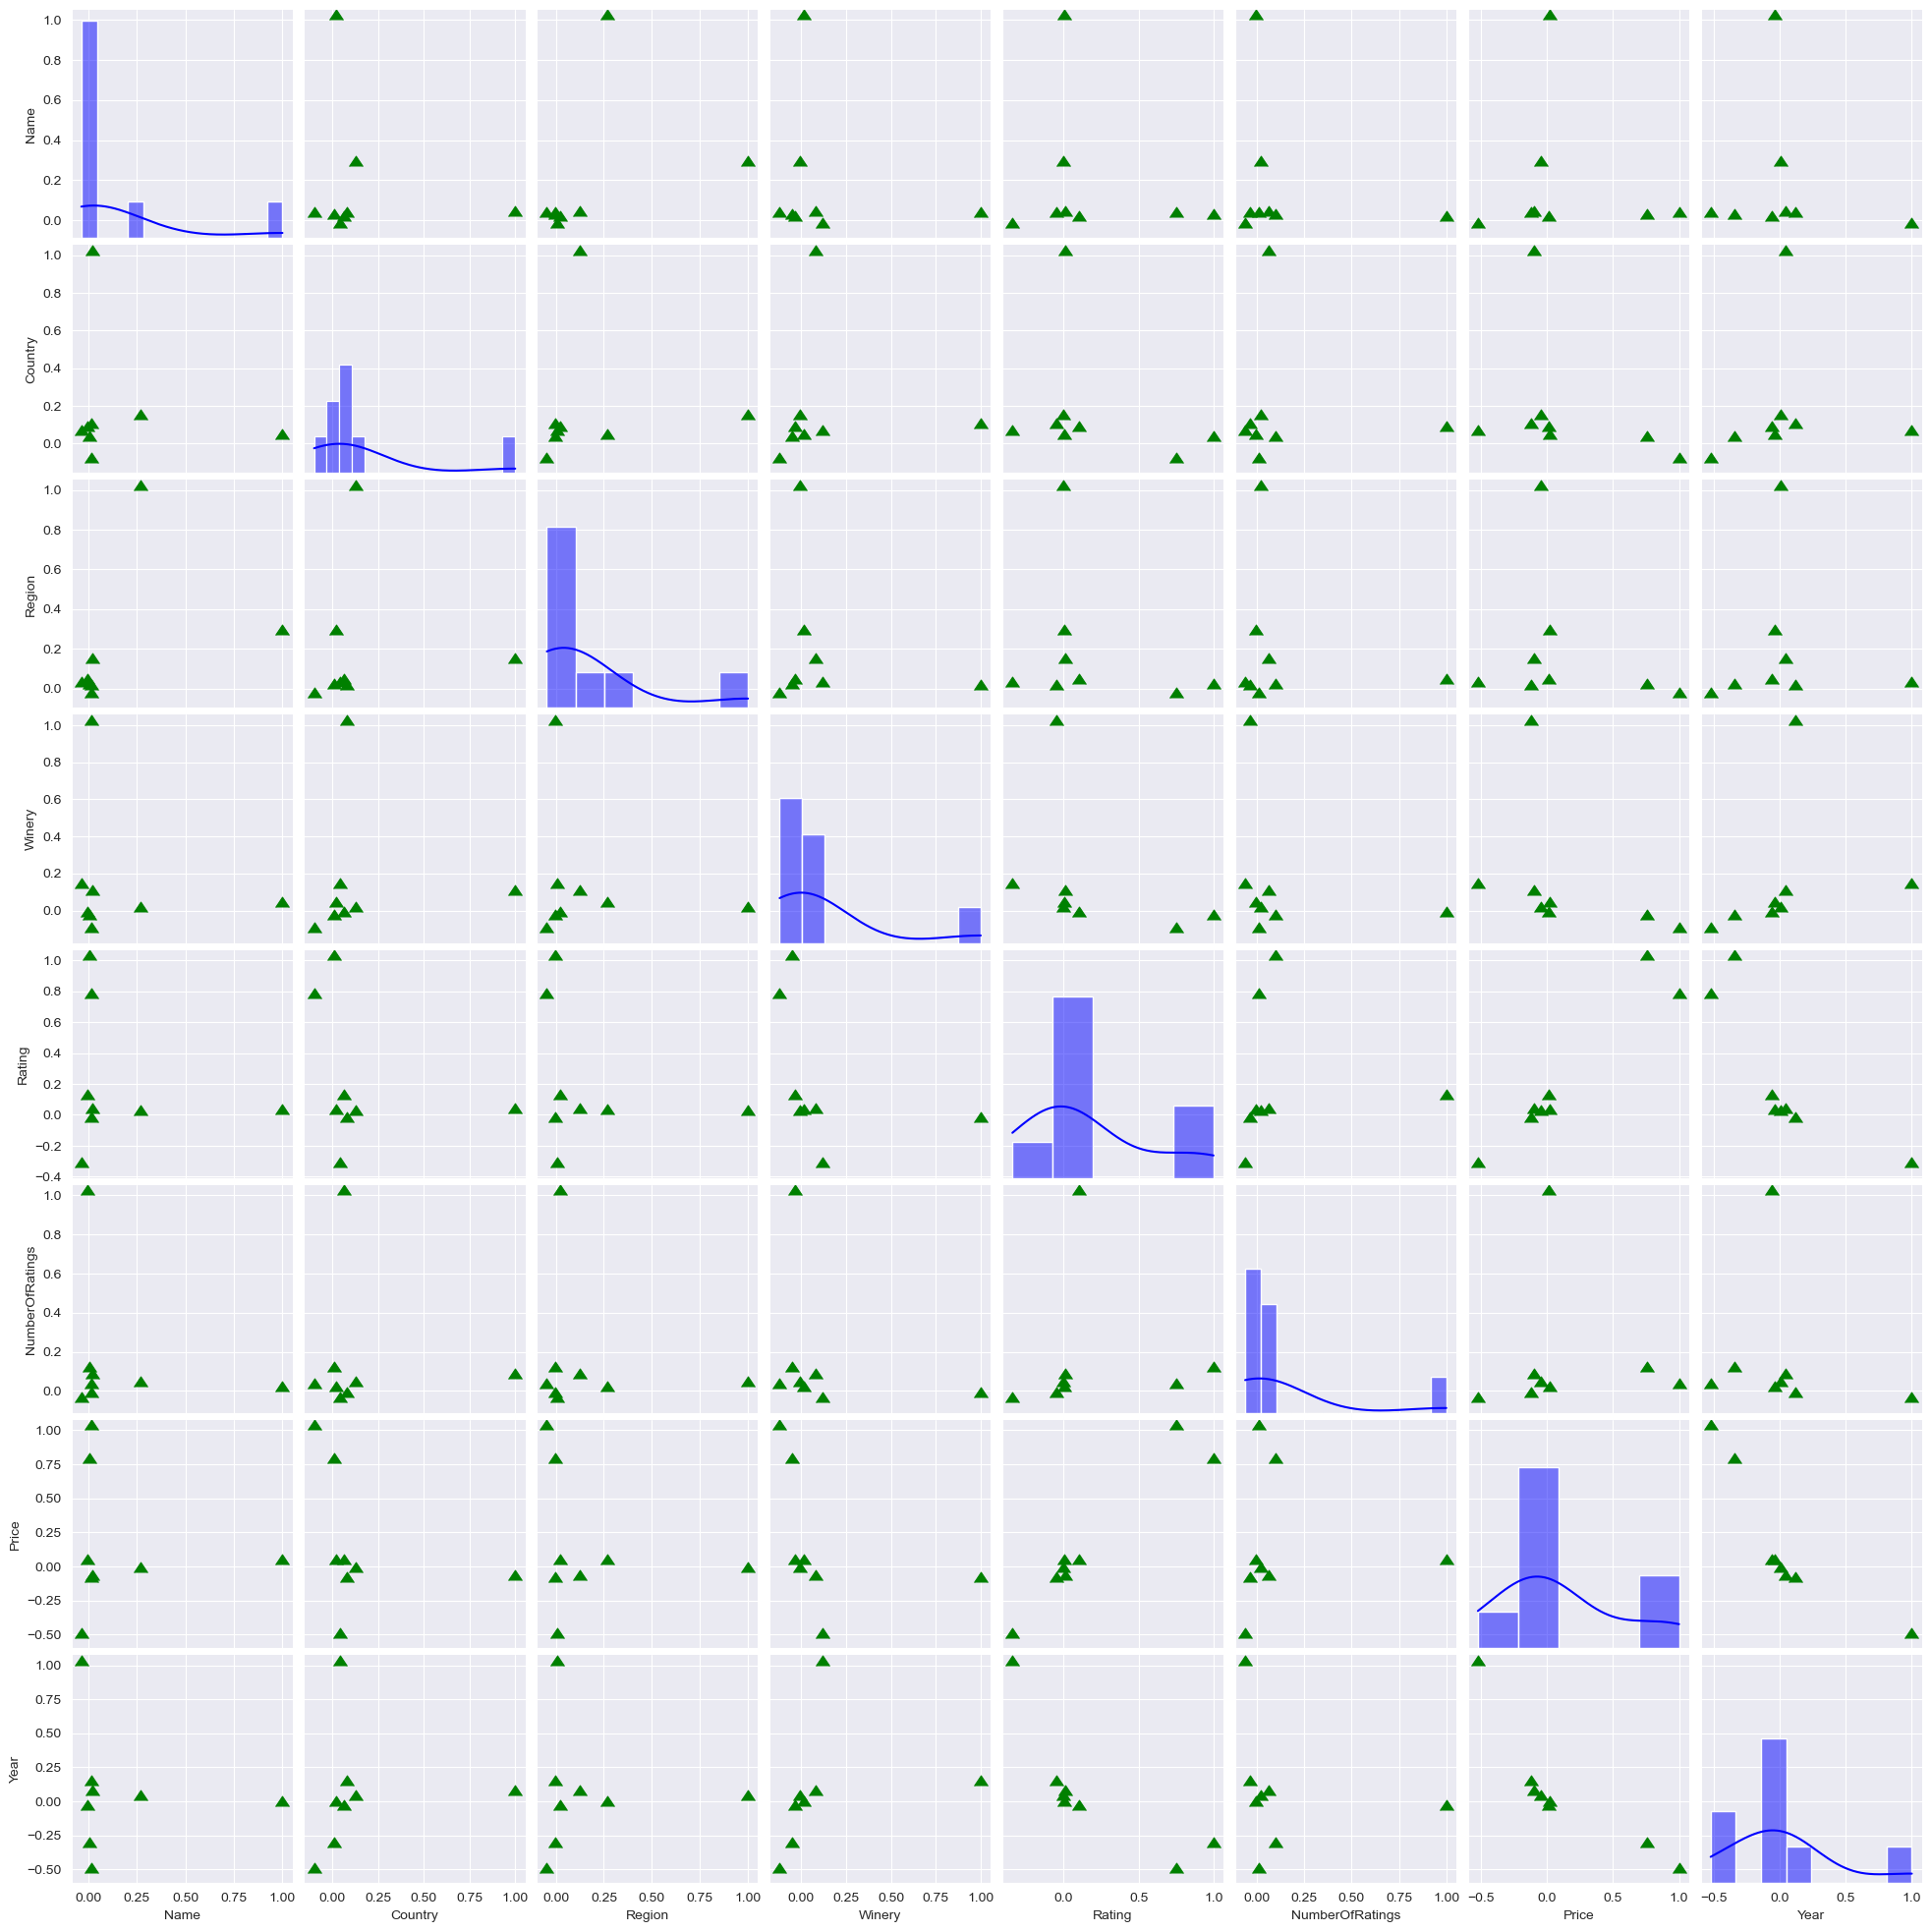

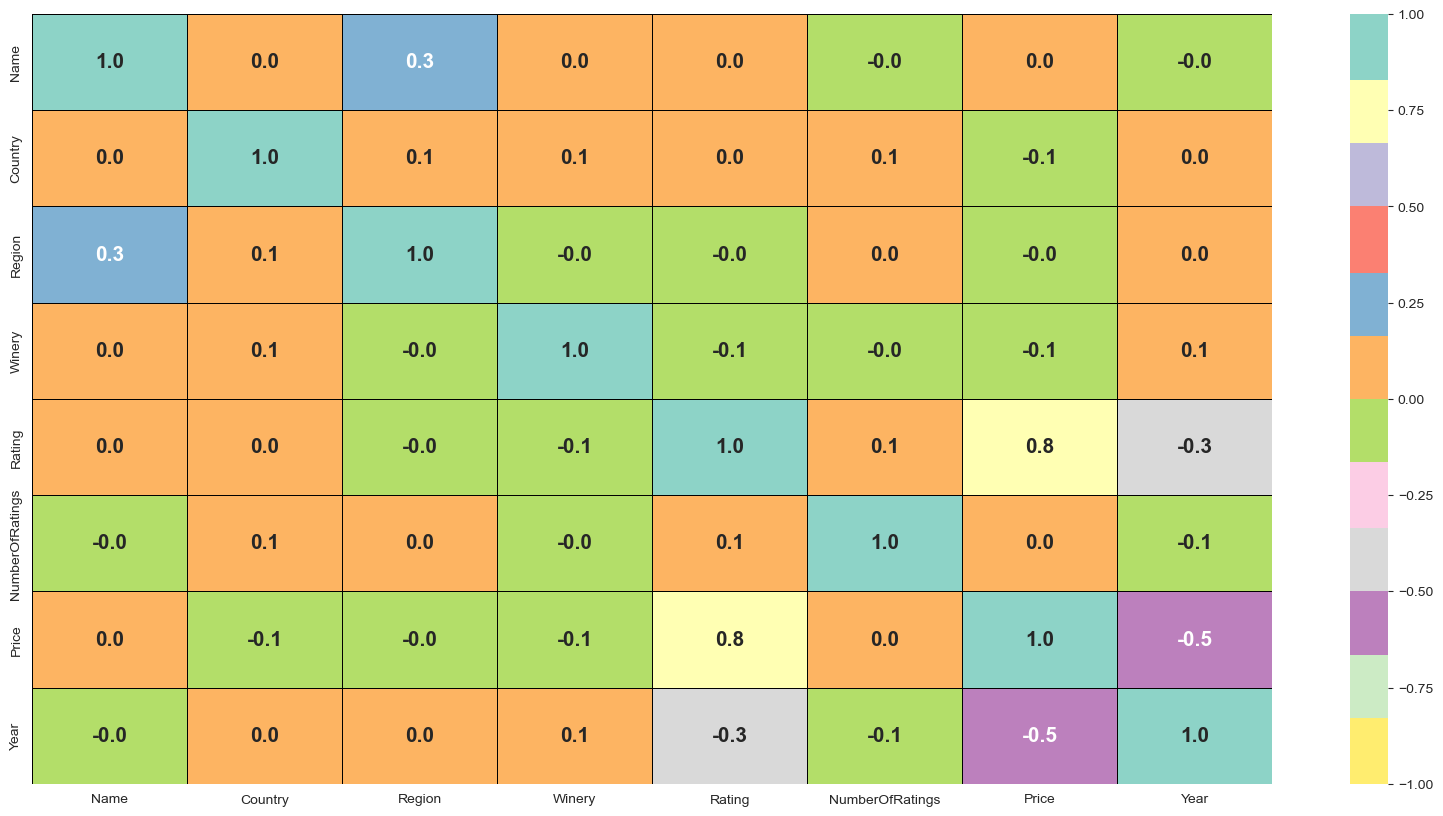

In [61]:
def correlation(dataset):
    sns.set_style('darkgrid')
    correlations  = dataset.corr()
    plt.figure(figsize=(20,10))
    sns.pairplot(data=correlations, diag_kws=dict(color='blue', kde=TabError), plot_kws=dict(color='green', marker=10, s=100))
    plt.show()
    plt.figure(figsize=(20,10))
    sns.heatmap(correlations, vmin=-1, vmax=1, center=0, cmap='Set3_r', annot=True, fmt='.1f', annot_kws=dict(size=15, weight='bold'), linecolor='black', linewidth=.5)
    plt.show()

correlation(dataset)